# CNN 

In [88]:
import pandas as pd
import cv2
from skimage.filters import prewitt_h, prewitt_v, sobel, roberts
from skimage.feature import canny
from skimage.io import imshow as ski_imshow
from matplotlib import pyplot as plt
import numpy
import random
import os
from IPython.display import display

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.applications as tfapp
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from projectLib import getLabelArray

## Getting Data Ready

In [89]:
data = pd.read_csv("..\data\HAM10000_metadata.csv")

# Creating a dataframe with 10%
# values of original dataframe
testData = data.sample(frac = 0.1)
 
# Creating dataframe with
# rest of the 89% values
trainData = data.drop(testData.index)

# class labels
classes = [['mel', 'Melanoma'], ['nv', 'Melanocytic nevus'], ['bcc', 'Basal cell carcinoma'], 
           ['akiec', 'Actinic keratosis / Bowen’s disease'], ['bkl', 'Benign keratosis'], ['df', 'Dermatofibroma'],
           ['vasc', 'Vascular lesion']]


# row = data.iloc[1]:
testImages = []
testLabels = []
for index, row in testData.iterrows():
    if index % 1000 == 0:
        print (index)

    ## read img from    
    img = cv2.imread("..\data\\allData\HAM10000_images\\" + row['image_id'] +".jpg", flags= cv2.IMREAD_COLOR)

    ## resize img
    dim = (144, 108)
    img = cv2.resize(img, dim)

    ## append img into list
    testImages.append(img)

    ## create classification for img
    arr = None
    if row['dx'] == 'mel':
        arr =  numpy.array([1,0,0,0,0,0,0])
    elif row['dx'] == 'nv':
        arr =  numpy.array([0,1,0,0,0,0,0])
    elif row['dx'] == 'bcc':
        arr =  numpy.array([0,0,1,0,0,0,0])
    elif row['dx'] == 'akiec':
        arr =  numpy.array([0,0,0,1,0,0,0])
    elif row['dx'] == 'bkl':
        arr =  numpy.array([0,0,0,0,1,0,0])
    elif row['dx'] == 'df':
        arr =  numpy.array([0,0,0,0,0,1,0])
    else:
        arr =  numpy.array([0,0,0,0,0,0,1])
    ## append classification
    testLabels.append(arr)
    # testLabels.append(getLabelArray(row['dx']))

trainImages = []
trainLabels = []
for index, row in trainData.iterrows():
    if index % 1000 == 0:
        print (index)
    img = cv2.imread("..\data\\allData\HAM10000_images\\" + row['image_id'] +".jpg", flags= cv2.IMREAD_COLOR)
    # img = img / 255  ## changes values 0-1
    dim = (144, 108)
    img = cv2.resize(img, dim)  ## resize
    trainImages.append(img)
    arr = None
    if row['dx'] == 'mel':
        arr =  numpy.array([1,0,0,0,0,0,0])
    elif row['dx'] == 'nv':
        arr =  numpy.array([0,1,0,0,0,0,0])
    elif row['dx'] == 'bcc':
        arr =  numpy.array([0,0,1,0,0,0,0])
    elif row['dx'] == 'akiec':
        arr =  numpy.array([0,0,0,1,0,0,0])
    elif row['dx'] == 'bkl':
        arr =  numpy.array([0,0,0,0,1,0,0])
    elif row['dx'] == 'df':
        arr =  numpy.array([0,0,0,0,0,1,0])
    else:
        arr =  numpy.array([0,0,0,0,0,0,1])
    trainLabels.append(arr)
    # trainLabels.append(getLabelArray(row['dx']))

# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


## Create Model

In [111]:
# Setting seed value for equivlent runs each time

# seed_value= 200  ## 76.8 on 38 epoch with meth best
seed_value= 651937450

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
numpy.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# model= models.Sequential()                          ## simple 3 layer feedword network              
# model.add(layers.Flatten(input_shape=(108, 144, 3)))
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))

# model= models.Sequential()                                                                         ## custom relu layer method, batch size 64, epoch 38 with seed 200, and lr=1e-4, gave 76.8% at 38 epoch
# model.add(layers.Conv2D(64,5,5, padding='same',input_shape=(108, 144, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))



# model_d=tfapp.DenseNet201(weights='imagenet',include_top=False, input_shape=(108, 144, 3))   ## method called densenet201  gave 78.62% at 21 epochs, with seed 651937450

# x=model_d.output

# x= layers.GlobalAveragePooling2D()(x)
# x= layers.BatchNormalization()(x)
# x= layers.Dropout(0.5)(x)
# x= layers.Dense(512,activation='relu')(x) 
# x= layers.Dense(512,activation='relu')(x) 
# x= layers.BatchNormalization()(x)
# x= layers.Dropout(0.5)(x)

# preds=layers.Dense(7,activation='softmax')(x) 


# model=models.Model(inputs=model_d.input,outputs=preds)
# model.summary()

# for layer in model.layers[:-8]:
#     layer.trainable=False
    
# for layer in model.layers[-8:]:
#     layer.trainable=True

# model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model.summary()


model= models.Sequential()                                                                        ## method from article https://www.nature.com/articles/s41598-022-22644-9   ## with seed 651937450 got 78.74 % accuracy on epoch 105, with 32 batch and .001 lr
model.add(layers.Conv2D(32,3,3, padding='same',input_shape=(108, 144, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3,3), padding='same'))
model.add(layers.Dropout(.25))
model.add(layers.Conv2D(64,3,3, padding='same', activation='relu'))
model.add(layers.Conv2D(64,3,3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(layers.Dropout(.25))
model.add(layers.Conv2D(128,3,3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,3,3, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(layers.Dropout(.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.5))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.Adam(lr=.001),        
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


# model.compile(optimizer= tf.keras.optimizers.Adam(lr=1e-4),        
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 36, 48, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 36, 48, 32)        128       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 12, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 4, 6, 64)          18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 2, 2, 64)          36928     
_________________________________________________________________
batch_normalization_23 (Batc (None, 2, 2, 64)        

c:\Users\jobo9\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## Train Model

In [112]:
xTrain = numpy.array(trainImages)
yTrain = numpy.array(trainLabels)
xTest = numpy.array(testImages)
yTest = numpy.array(testLabels)




In [116]:

## deeper model small batch size --> shallow model big batch

# history = model.fit(xTrain, yTrain, epochs=38,    ## use this one for every model but the last one 
#                     validation_data=(xTest, yTest), batch_size=64)

history = model.fit(xTrain, yTrain, epochs=150,    ## use this one for only the last model
                    validation_data=(xTest, yTest), batch_size=32)



Epoch 1/150
282/282 [==============================] - 21s 75ms/step - loss: 0.3845 - accuracy: 0.8638 - val_loss: 0.8030 - val_accuracy: 0.7305
Epoch 2/150
282/282 [==============================] - 22s 78ms/step - loss: 0.3656 - accuracy: 0.8655 - val_loss: 0.7973 - val_accuracy: 0.7655
Epoch 3/150
282/282 [==============================] - 22s 79ms/step - loss: 0.3802 - accuracy: 0.8596 - val_loss: 0.7882 - val_accuracy: 0.7675
Epoch 4/150
282/282 [==============================] - 22s 78ms/step - loss: 0.3681 - accuracy: 0.8650 - val_loss: 0.7223 - val_accuracy: 0.7715
Epoch 5/150
282/282 [==============================] - 23s 82ms/step - loss: 0.3675 - accuracy: 0.8660 - val_loss: 0.7706 - val_accuracy: 0.7675
Epoch 6/150
282/282 [==============================] - 22s 78ms/step - loss: 0.3656 - accuracy: 0.8676 - val_loss: 0.7167 - val_accuracy: 0.7585
Epoch 7/150
282/282 [==============================] - 21s 75ms/step - loss: 0.3725 - accuracy: 0.8652 - val_loss: 0.7375 - val_ac

KeyboardInterrupt: 

## Evalute Model

32/32 - 1s - loss: 0.7062 - accuracy: 0.7764
Test Loss 0.706160306930542
Test Accuracy 0.7764471173286438


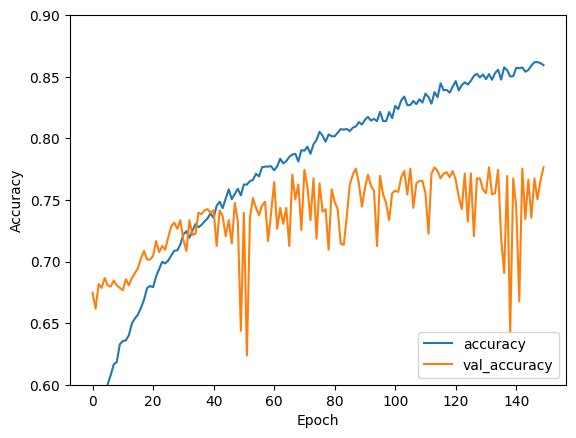

In [115]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, .9])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(xTest,yTest, verbose=2)
print( f'Test Loss {test_loss}')
print( f'Test Accuracy {test_acc}')